In [1]:
import numba as nb
import torch
import numpy as np 
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time
import torch.optim as optim
os.chdir('/home/baly/projects/sopt_shape')
from lib.library import *
from lib.lib_ot import *
from lib.sliced_opt import *
from lib.lib_shape import *

#import opt1d
# !python --version
# from google.colab import drive
# !pip install numpy --upgrade
# !pip install numba --upgrade

In [33]:
# load data 

eta=0.05

label='female_19_2'
save_path='result/3D_female_'+str(eta)
method='OPT_RBF'
# data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
data=torch.load('data/%s.pt'%label)

X0=data['X0']
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]
sigma2,eps=0.1,1.0

device='cuda'
start_time=time.time()
model_list,record_index=OPT_RBF(X,Y,N0,n_iteration=200,start_epoch=20,threshold=0.8,device=device,numItermax=100000, numThreads=10)
end_time=time.time()


torch.save((model_list,record_index,end_time-start_time),save_path+'%s.pt'%(method))

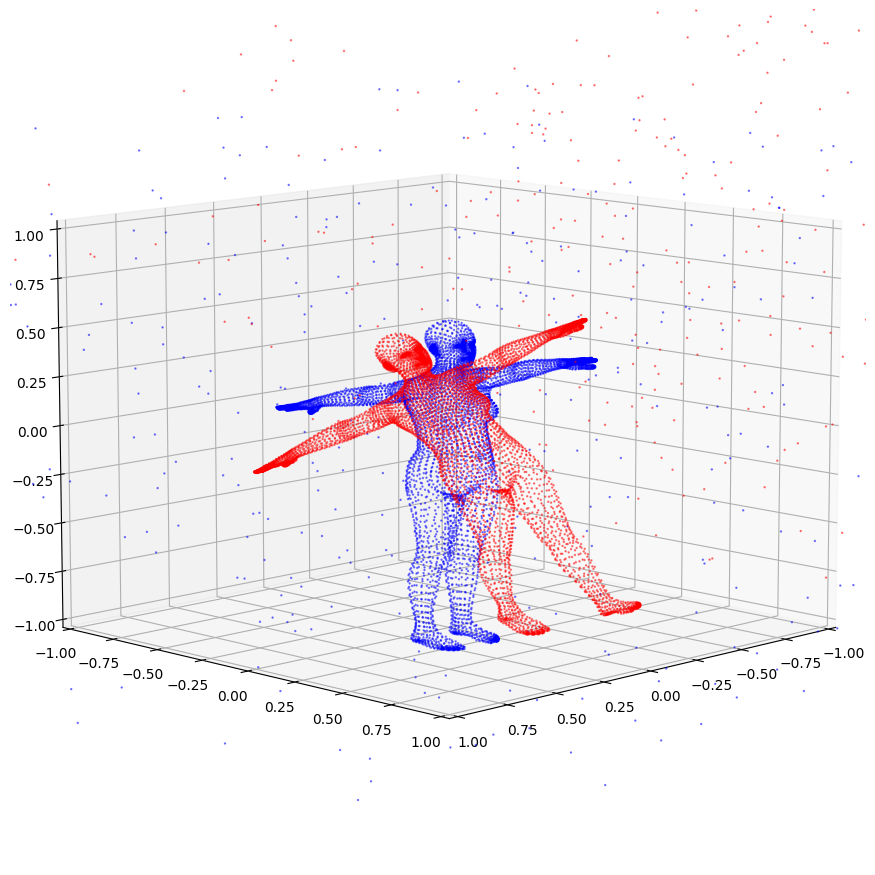

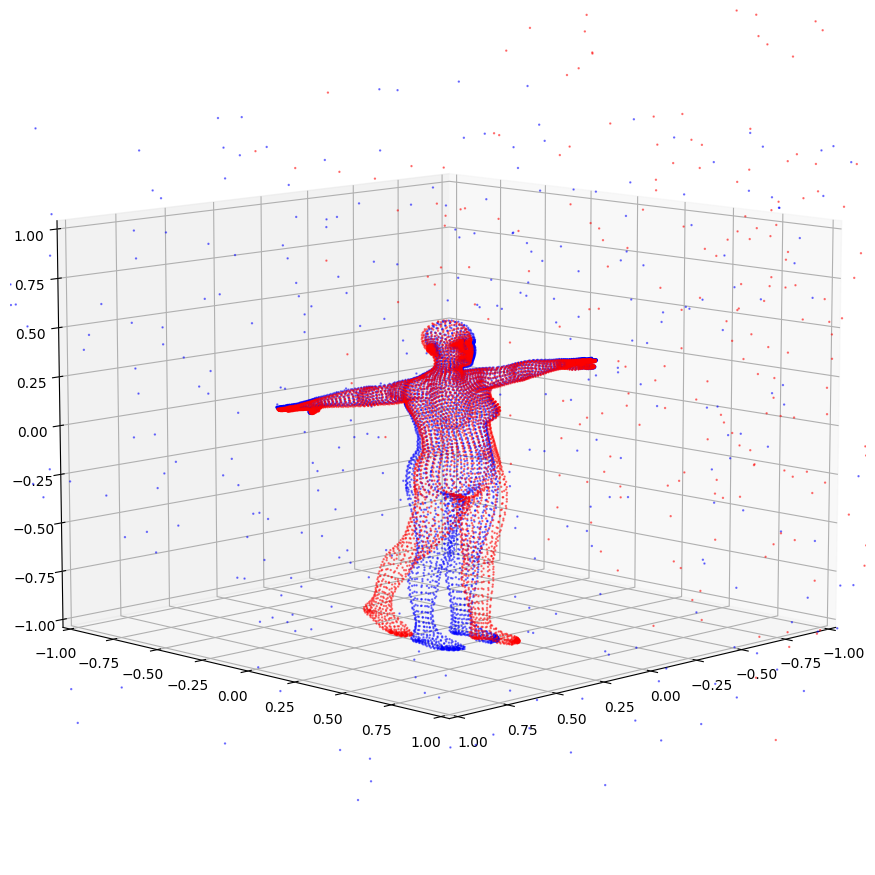

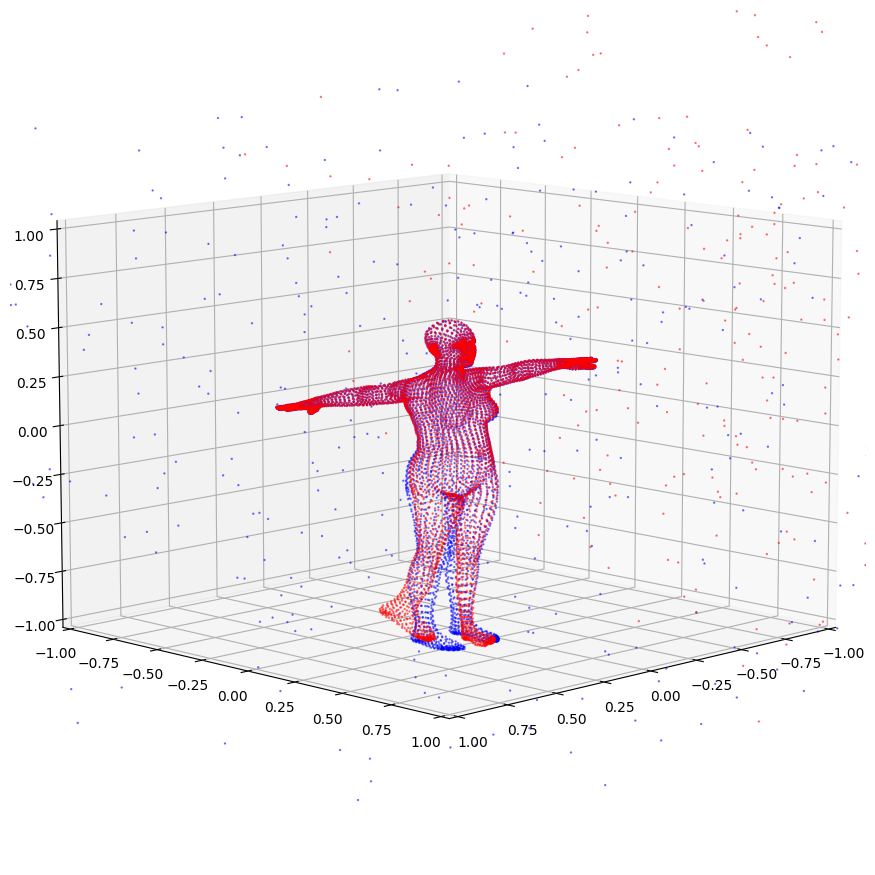

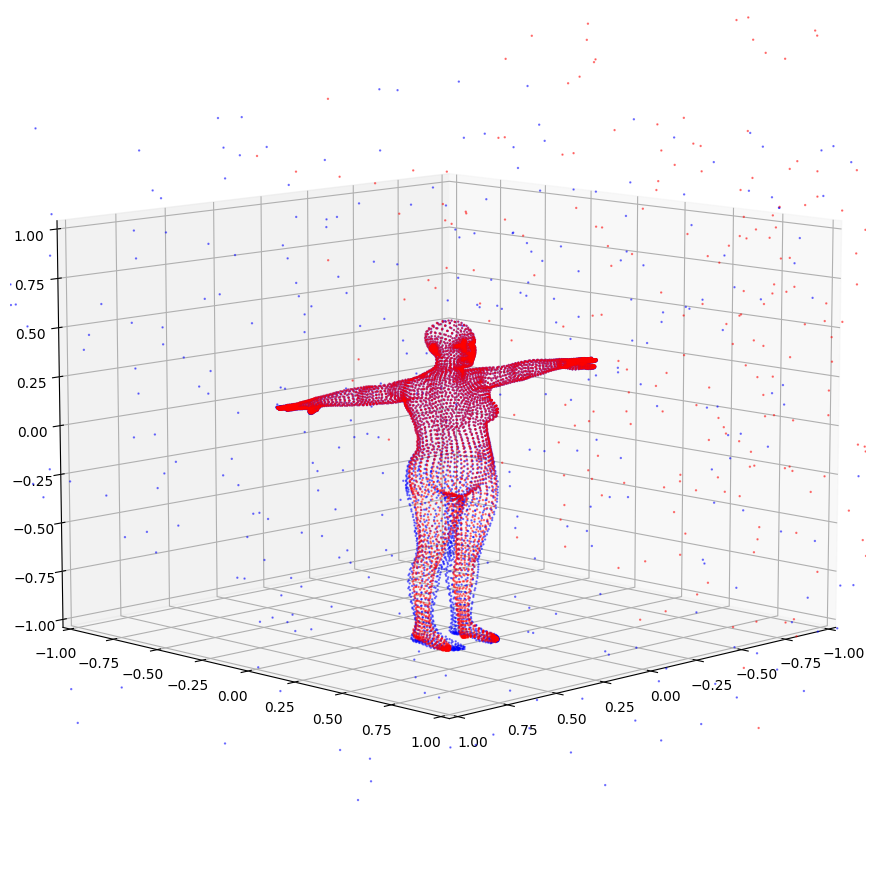

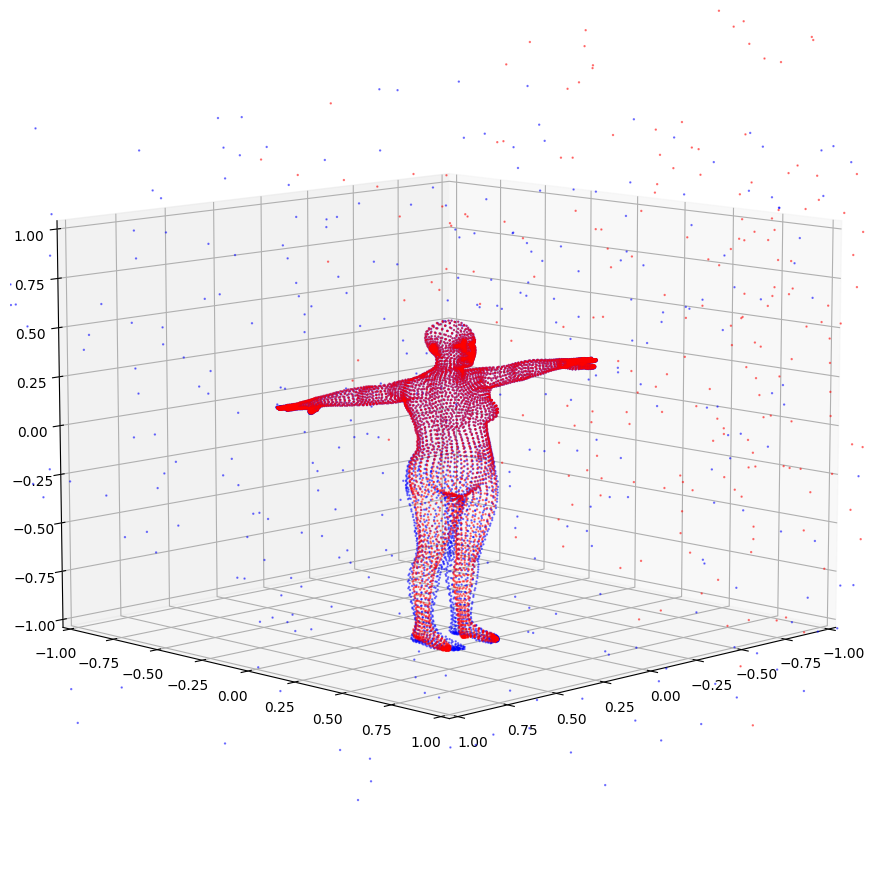

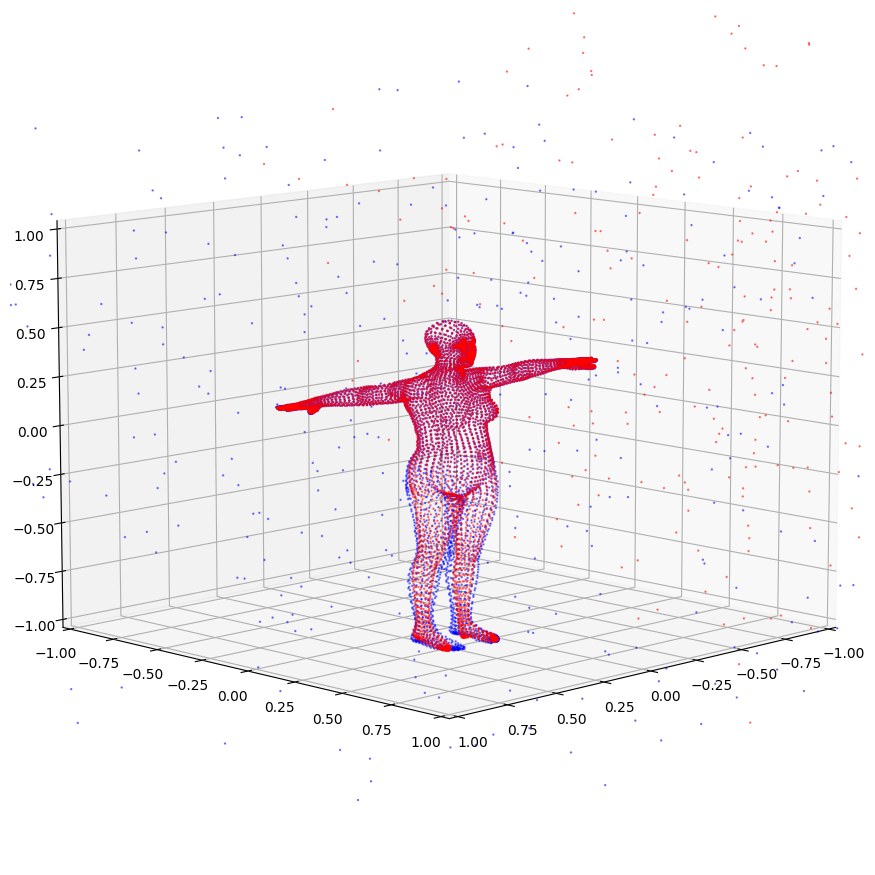

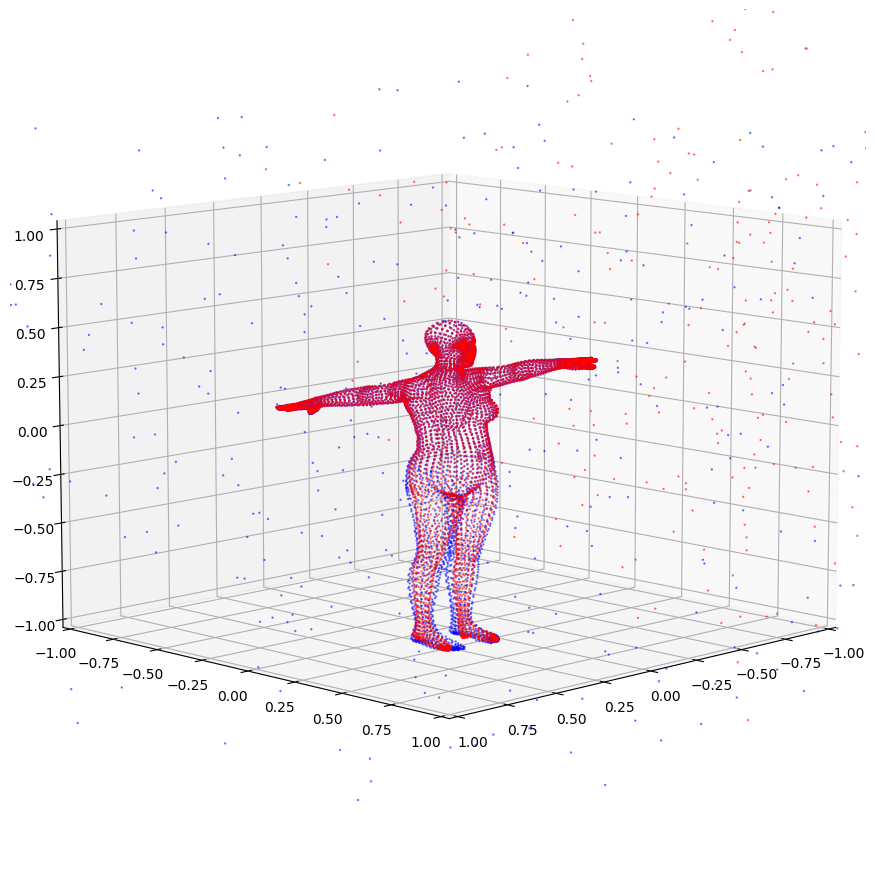

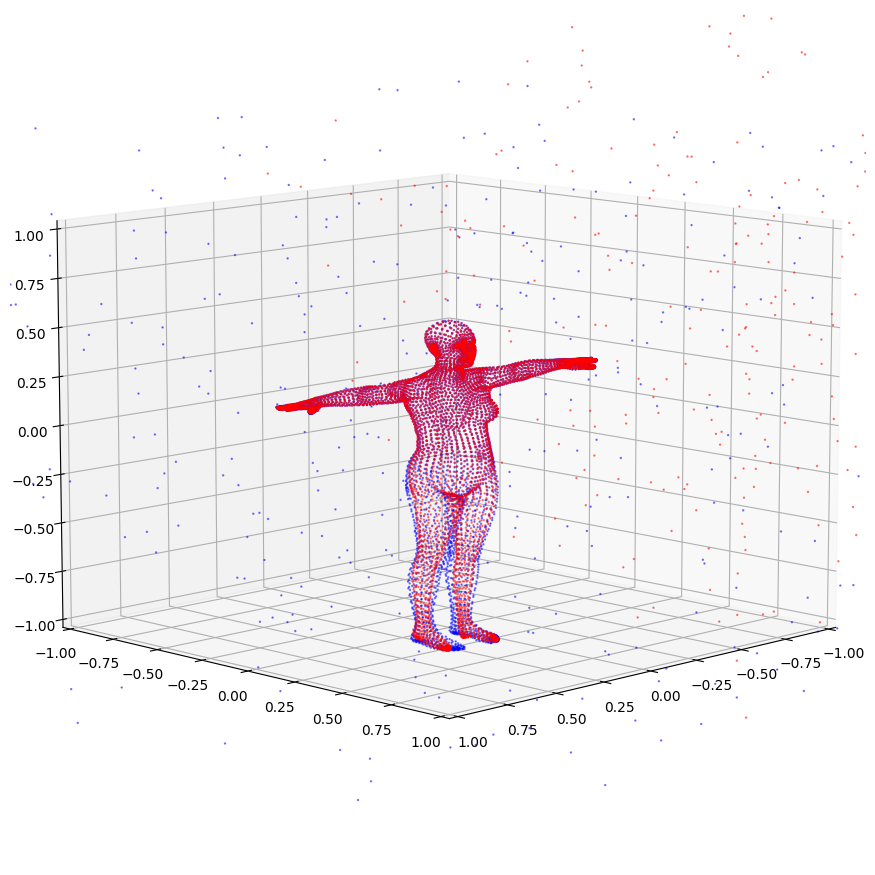

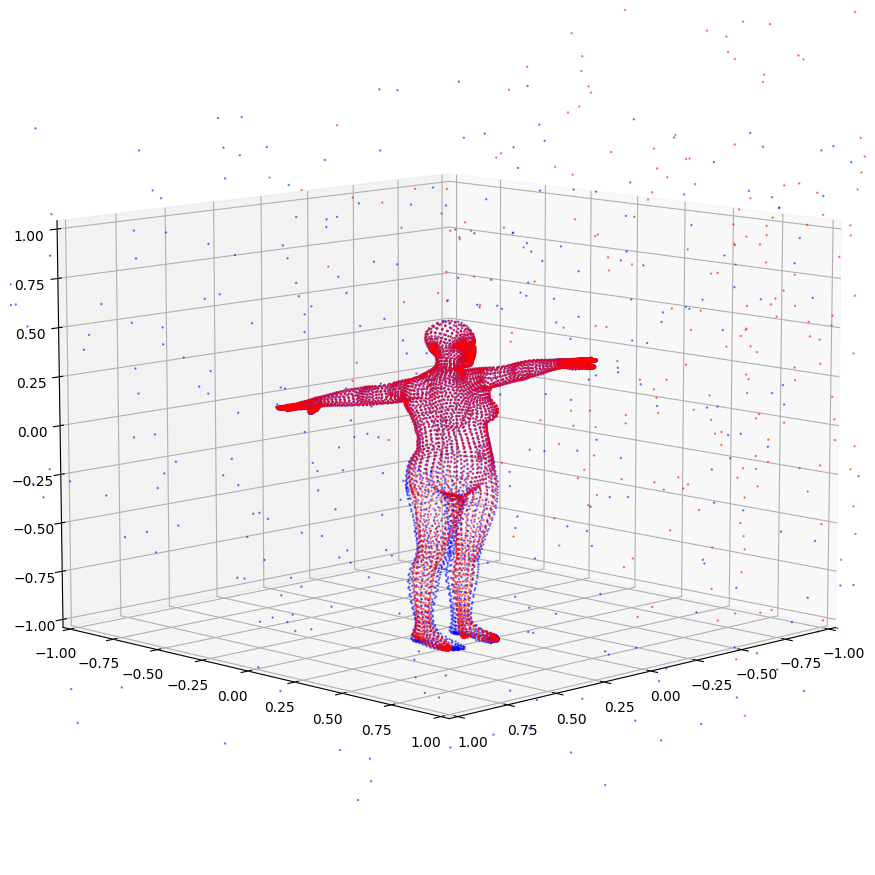

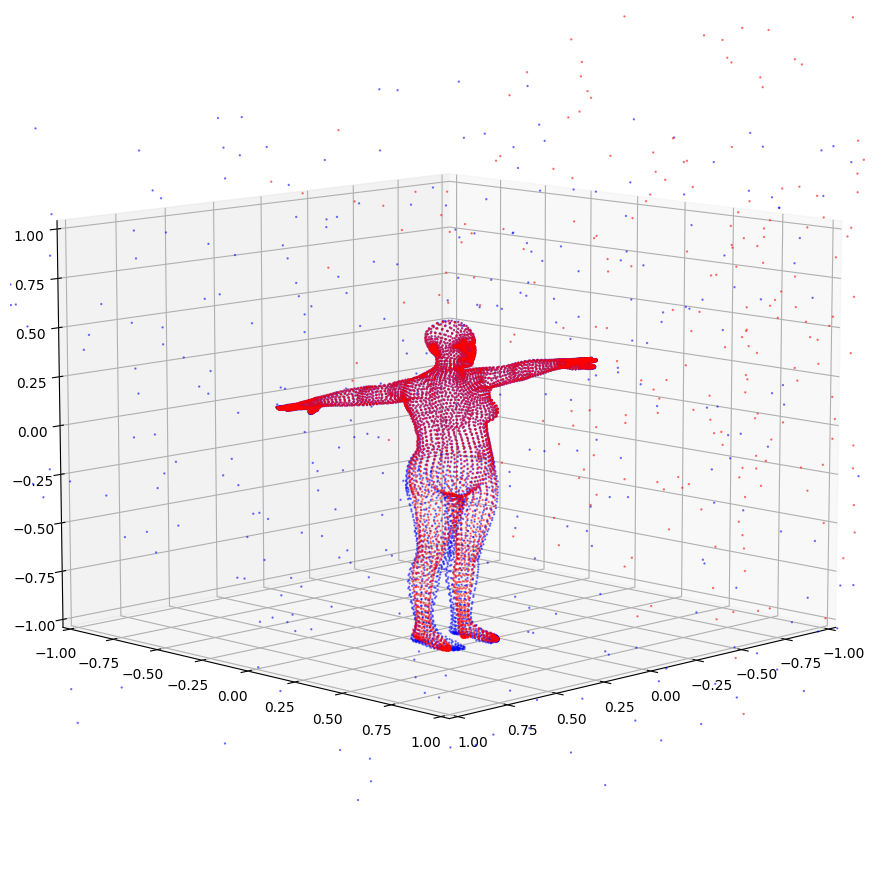

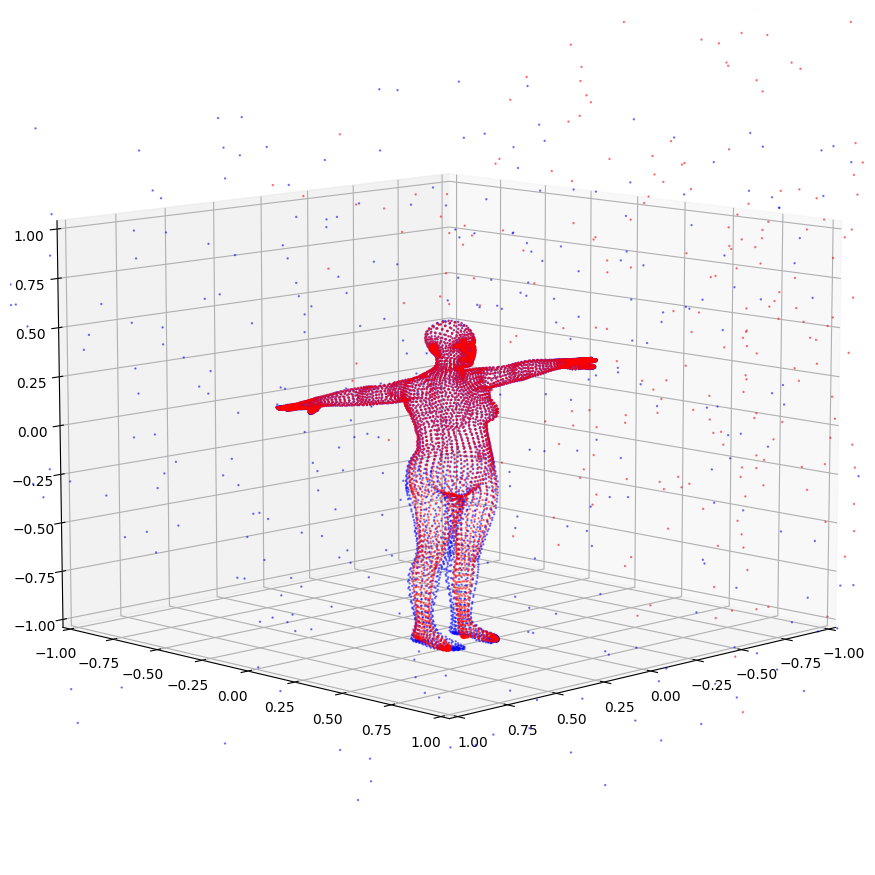

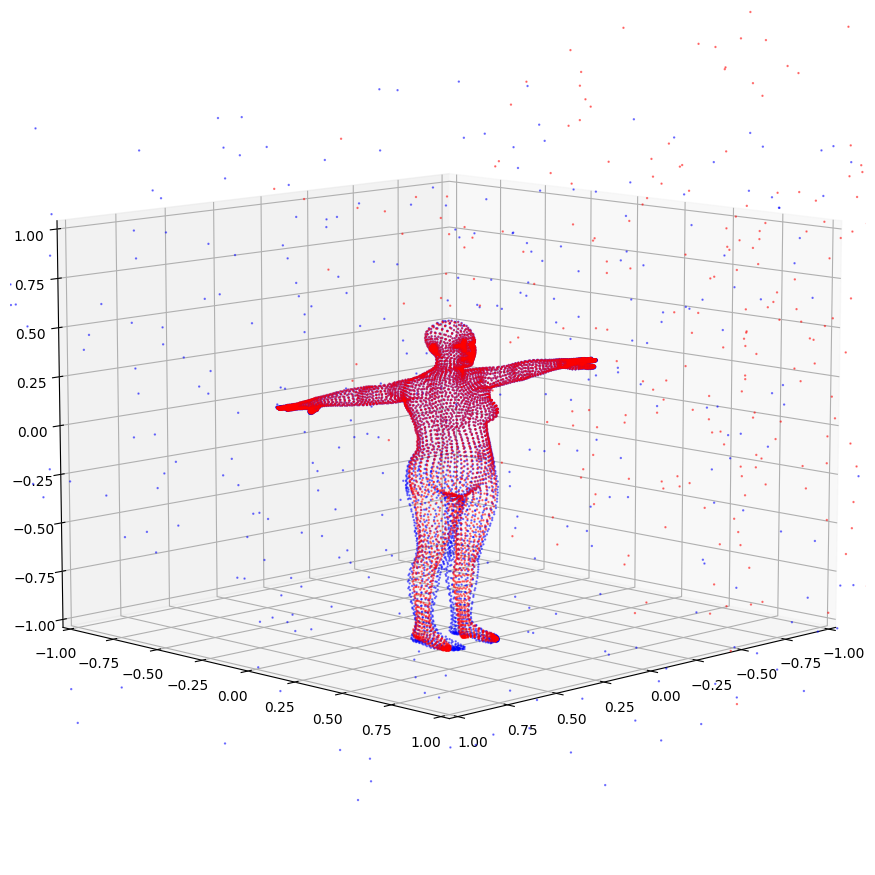

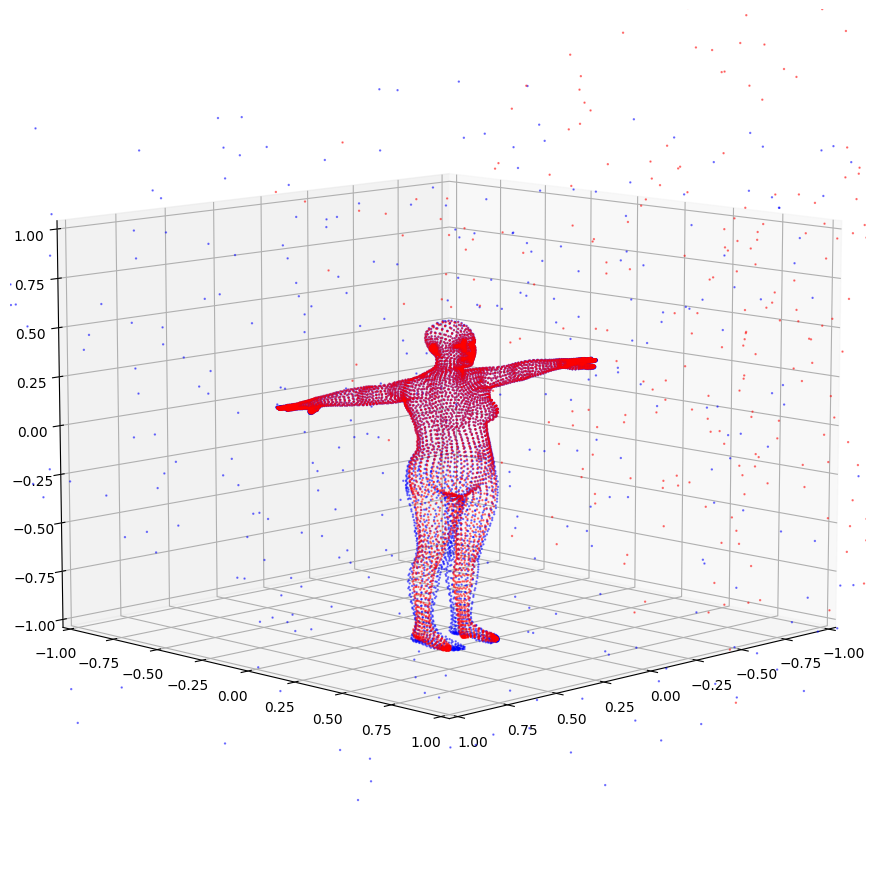

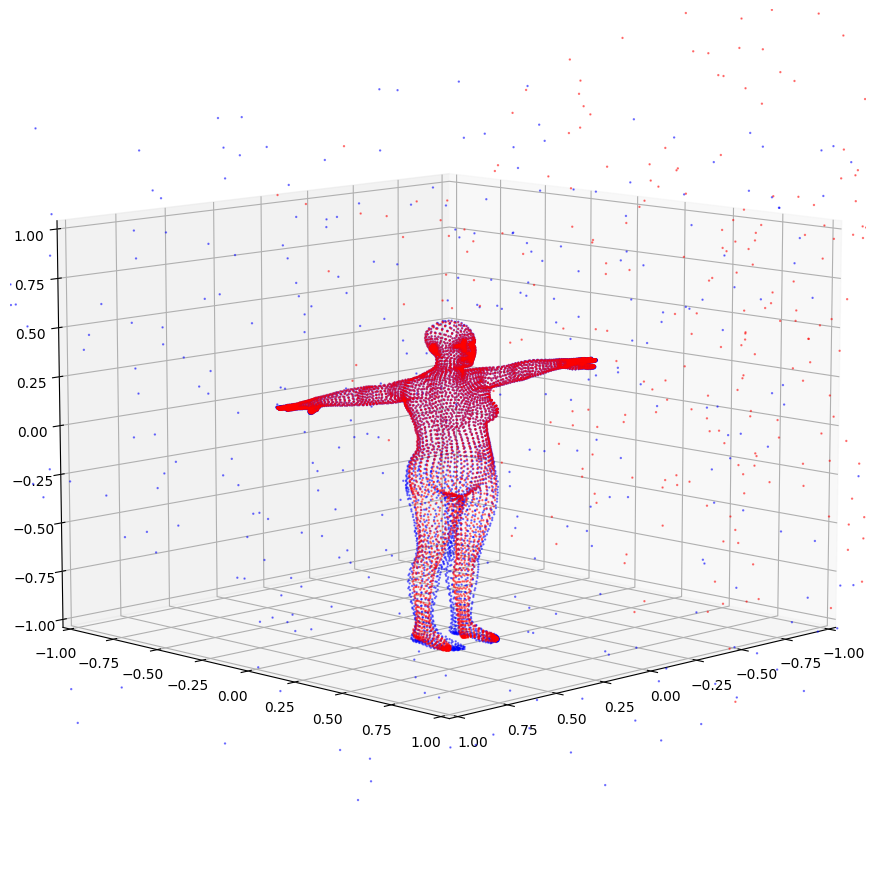

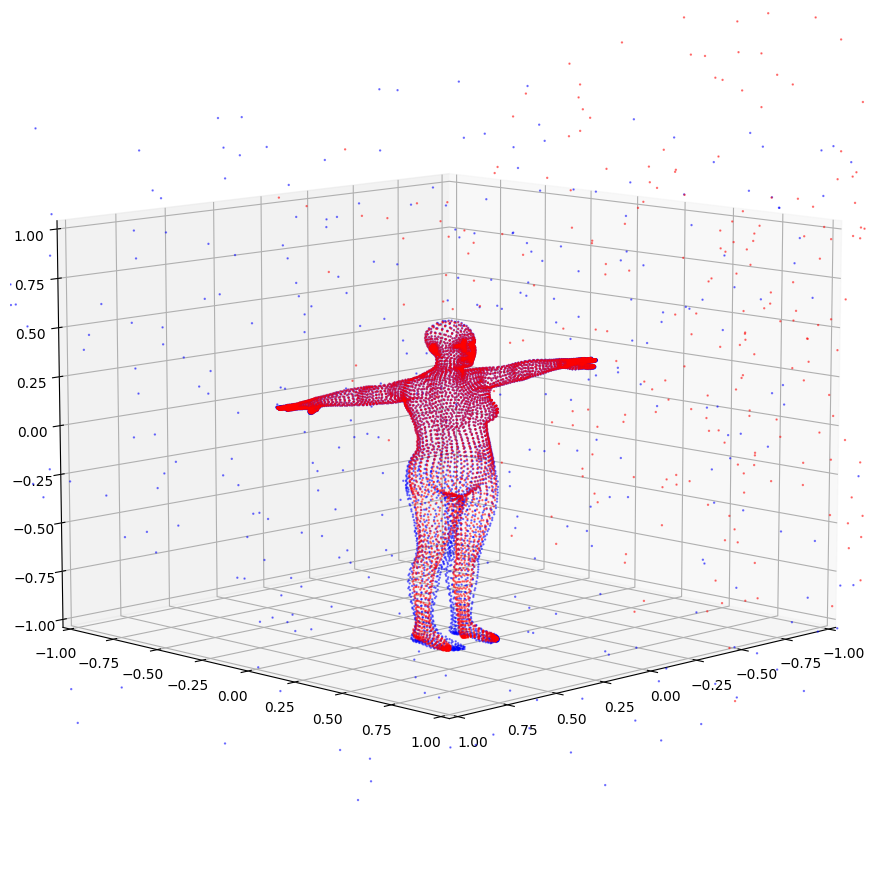

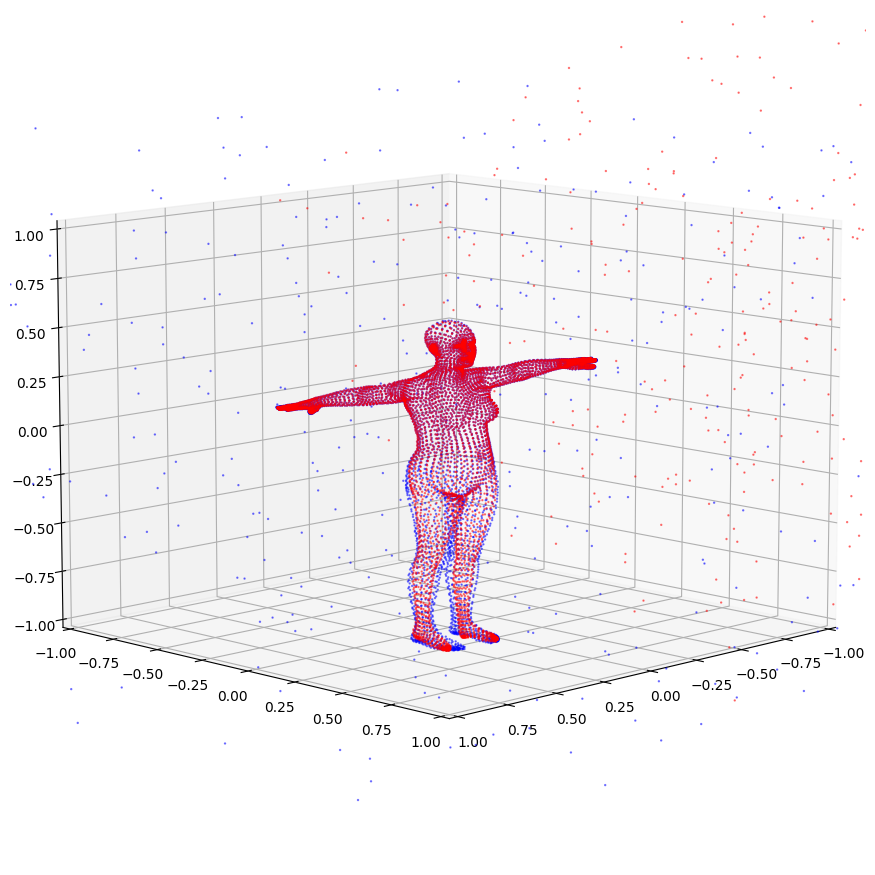

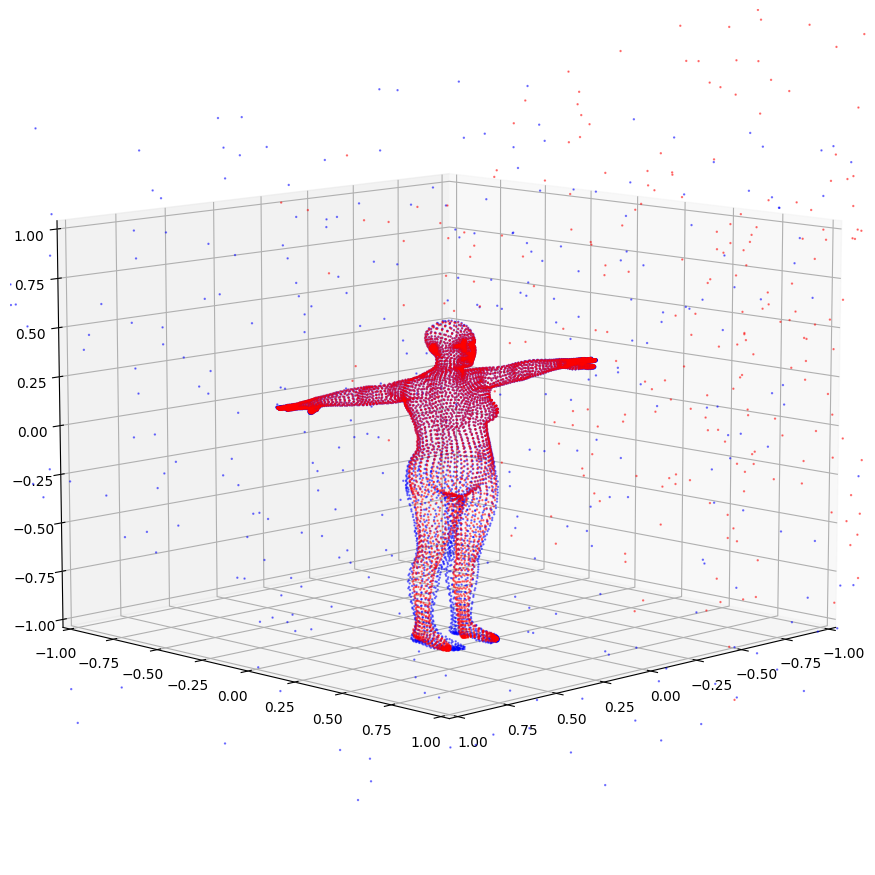

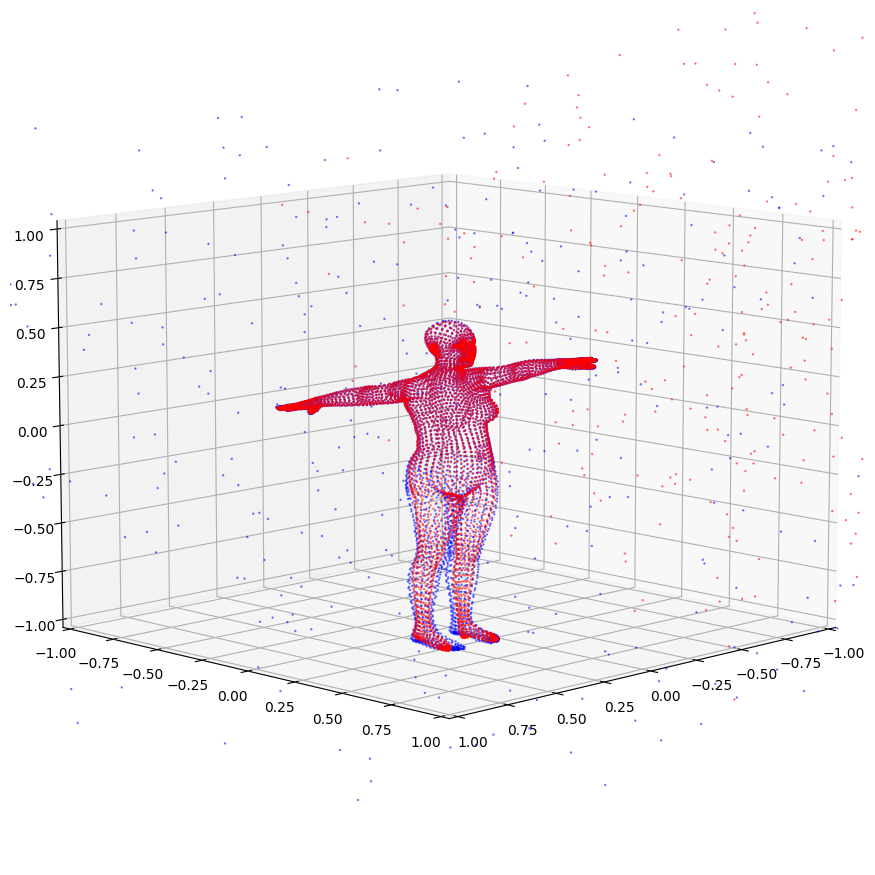

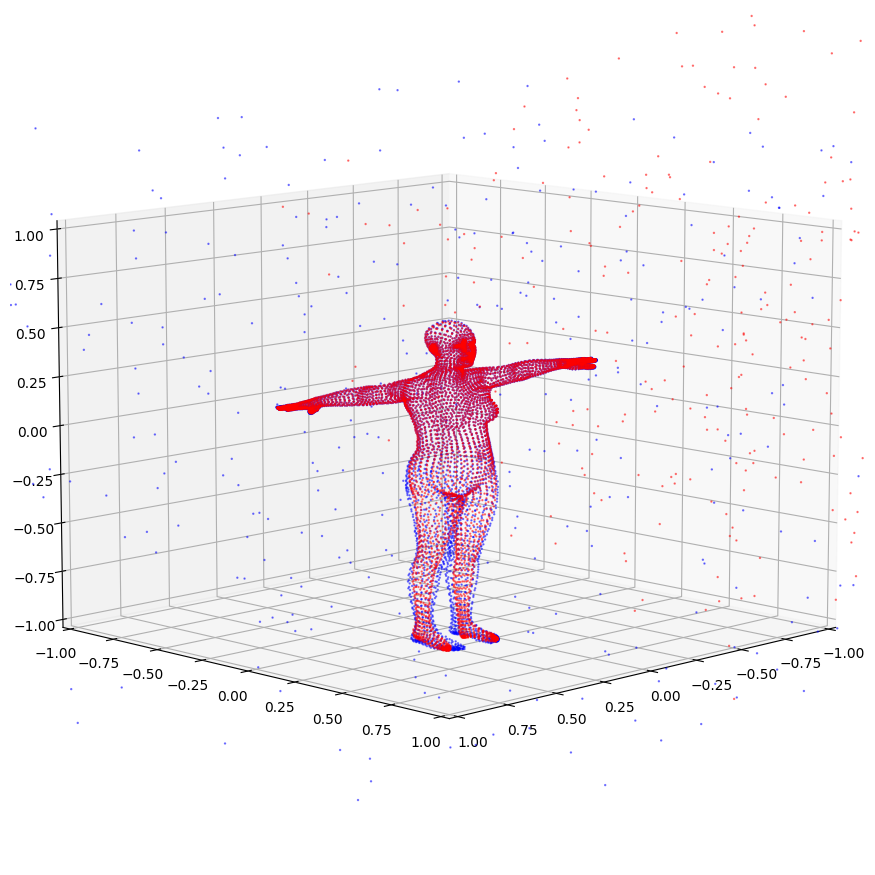

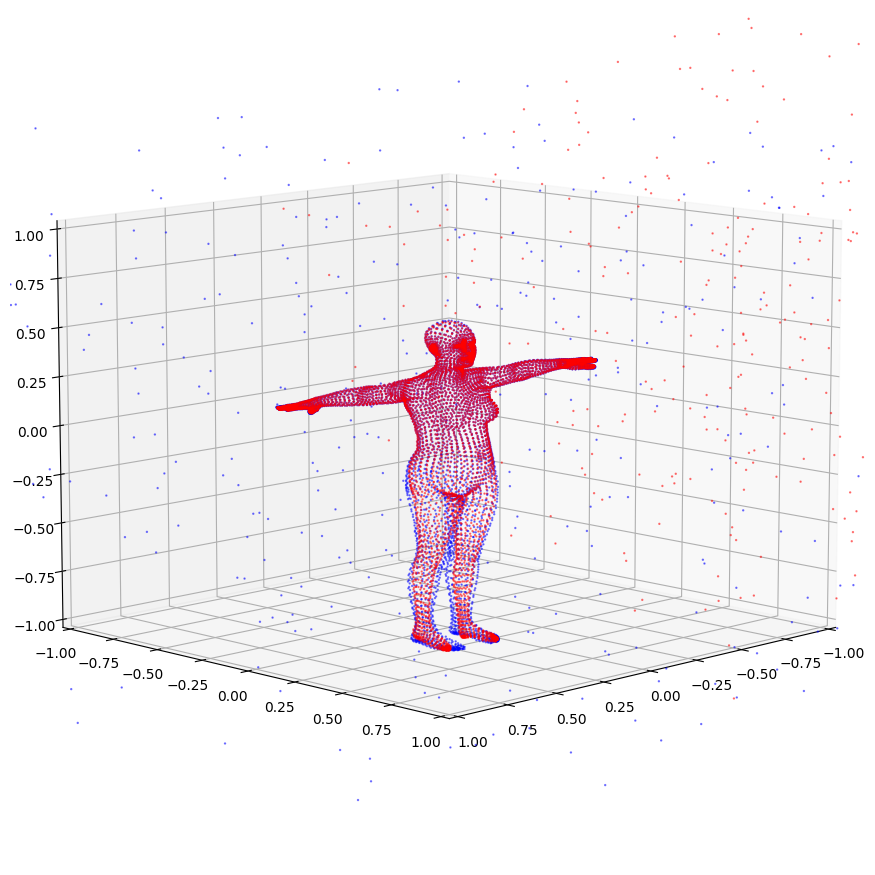

In [34]:
def model_to_Yhat(model_list,X,model='RBF'):
  Yhat_list=list()
  if model=='RBF':
    R_list,beta_list,alpha_list,Phi=model_list
    n_iteration=len(alpha_list)
    for epoch, (R,beta,alpha) in enumerate(zip(R_list,beta_list,alpha_list)):
      Yhat=Phi.dot(alpha)+X.dot(R)+beta
      Yhat_list.append(Yhat)

  if model=='TPS':
    X_bar=np.hstack((np.ones((X.shape[0],1)),X))
    B_list,alpha_list,Phi=model_list
    n_iteration=len(alpha_list)
    for epoch,(B,alpha) in enumerate(zip(B_list,alpha_list)):
      Yhat=Phi.dot(alpha)+X_bar.dot(B)
      Yhat_list.append(Yhat)

  return Yhat_list



def make_plot(X,Y,file_name=None):
  fig = plt.figure(figsize=(2*800/72,800/72))
  ax = fig.add_subplot(projection='3d')
  x=X[:,0]
  y=X[:,1]
  z=X[:,2]
  ax.scatter3D(X[:,0], X[:,2], X[:,1], s=0.5,c='r',alpha=0.5) #=X[:,1]*np.sqrt(X[:,0]**2+X[:,2]**2), cmap='bone')

  ax.scatter3D(Y[:,0], Y[:,2], Y[:,1], s=0.5,c='b',alpha=0.5) #Y[:,1]*np.sqrt(Y[:,0]**2+Y[:,2]**2), cmap='bone')

  ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
  ax.view_init(10, 45)
  if file_name!=None:
      plt.savefig(file_name,dpi=200)
  plt.show()

def visual_3D(Yhat_list,Y,path,record_index):
  for (Yhat,index) in zip(Yhat_list,record_index):
    file_name=path+'_'+str(index)+'.pdf'
    make_plot(Yhat,Y,file_name)

if 'RBF' in method or 'GD' in method:
    model='RBF'
elif 'TPS' in method:
    model='TPS'
Yhat_list=model_to_Yhat(model_list,X,model=model)
path=save_path+method

visual_3D(Yhat_list,Y,path,record_index)




In [32]:
'RBF' or 'GD' in method

'RBF'

In [23]:
method

'OPT_TPS'

In [19]:
model_list

([array([[-0.06786221,  1.21454178,  0.91387496],
         [ 0.90098524,  0.32705602,  0.28506133],
         [-0.38731062,  0.90240735,  0.18881458],
         [-0.19548868, -0.28052661,  0.93972796]]),
  array([[-0.57582996,  0.78738731,  1.1793932 ],
         [ 0.69747311,  0.45479298,  0.55380028],
         [-0.68947232,  0.63654506,  0.3455984 ],
         [-0.19534314, -0.62287563,  0.75754035]]),
  array([[-0.57582996,  0.78738731,  1.1793932 ],
         [ 0.69747311,  0.45479298,  0.55380028],
         [-0.68947232,  0.63654506,  0.3455984 ],
         [-0.19534314, -0.62287563,  0.75754035]]),
  array([[-0.57582996,  0.78738731,  1.1793932 ],
         [ 0.69747311,  0.45479298,  0.55380028],
         [-0.68947232,  0.63654506,  0.3455984 ],
         [-0.19534314, -0.62287563,  0.75754035]]),
  array([[-0.57582996,  0.78738731,  1.1793932 ],
         [ 0.69747311,  0.45479298,  0.55380028],
         [-0.68947232,  0.63654506,  0.3455984 ],
         [-0.19534314, -0.62287563,  0.757

In [5]:
record_index

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 222, 232, 242, 252,
       262, 272, 282, 292, 302, 312, 322, 333, 343, 353, 363, 373, 383,
       393, 403, 413, 423, 433, 444, 454, 464, 474, 484, 494, 504, 514,
       524, 534, 544, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645,
       655, 666, 676, 686, 696, 706, 716, 726, 736, 746, 756, 766, 777,
       787, 797, 807, 817, 827, 837, 847, 857, 867, 877, 888, 898, 908,
       918, 928, 938, 948, 958, 968, 978, 988, 999])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# load data 
i=19
j=2

eta=0.05
label='female'

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
record_index=[0,1,5,10]


X0=data['X0']+20
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)] #'+str(eta)]
sigma2=0.1
eps=3.0


N0=X0.shape[0]
n_projection=100
n_iteration=200

#sopt_GD(X,Y,N0,n_projections=n_projections,n_iteration=n_iteration)
#SOPT_TPS(X,Y,N0,n_projections=n_projections,n_iteration=n_iteration)
#OPT_TPS(X,Y,N0,n_projection=n_projection,n_iteration=n_iteration)
OPT_RBF(X,Y,N0,n_projection=n_projection,n_iteration=n_iteration)



In [ ]:
# load data 
i=19
j=2

eta=0.05
label='female'

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
record_index=[0,1,5,10]



X0=data['X0']
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]
sigma2=0.1
eps=3.0


C=X.copy() #[0:N0] #[sample_index] #.copy()
make_plot(X,Y)
N0=X0.shape[0]
Phi=kernel_matrix_Gaussian(C,X,sigma2) 
N1,D=X.shape
K=N1





# initlize 
R=np.eye(D)    
S=1.0 
beta=vec_mean(Y)-vec_mean(S*X.dot(R)) 
alpha=np.zeros((C.shape[0],D))

mass_diff=0

b=(N1-N0)/400 #np.log((N1-N0+1)/1)
Lambda=4*np.sum((vec_mean(Y)-vec_mean(X))**2)
Yhat=Phi.dot(alpha)+S*X.dot(R)+beta
make_plot(Yhat,Y)

X_bar=np.hstack((np.ones((X.shape[0],1)),X))
Delta=Lambda/8
lower_bound=Lambda/10000

# Yhat_list=list()
n_projections=2000
projections=projections=random_projections(D,n_projections,1)
repeat=100
epoch=0
Yhat_move=Yhat.copy()
while epoch<n_projections: 
    Yhat_pre=Yhat.copy()
    R_pre,beta_pre=R.copy(),beta.copy()
    Yhat_move=Yhat.copy()
    mass_sum=0.0
    domain_sum=np.full(N1,False)
    for ind in range(repeat):
        if epoch >=n_projections:
          break
        theta=projections[epoch]
        Yhat_theta,Y_theta=np.dot(theta,Yhat.T),np.dot(theta,Y.T)
        Yhat_indice,Y_indice=Yhat_theta.argsort(),Y_theta.argsort()
        Yhat_s,Y_s=Yhat_theta[Yhat_indice],Y_theta[Y_indice]
        obj,phi,psi,piRow,piCol=solve_opt(Yhat_s,Y_s,Lambda)
        L=recover_indice(Yhat_indice,Y_indice,piRow)
        Domain,Range=L>=0,L[L>=0]
        domain_sum=np.logical_or(Domain,domain_sum) 
        Yhat[Domain]+=np.expand_dims(Y_theta[Range]-Yhat_theta[Domain],1)*theta
        epoch+=1
        mass_sum+=np.sum(Domain)
    print('moved')
    make_plot(Yhat,Y)

    mass=mass_sum/repeat
    mass_diff=mass-N0
    # print(mass_diff)
    if mass_diff>N0*0.003:
        Lambda-=Delta 
    if mass_diff<-N0*0.003:
        Lambda+=Delta
        Delta=Lambda*1/8
    if Lambda<Delta:
        Lambda=Delta
        Delta=Delta*1/2
    if Delta<lower_bound:
        Delta=lower_bound

   
    
    # find optimal R,S,beta, conditonal on alpha
    Y2=Yhat[domain_sum]-Phi[domain_sum].dot(alpha)

    #Y2=Yhat-Phi.dot(alpha)
    
    # R,S,beta=1/2*R+1/2*R1,1/2*S+1/2*S1,1/2*beta+1/2*beta1

    # update Yhat by alpha, Phi
    R,S=recover_rotation(Y2,X[domain_sum])
    beta=vec_mean(Y2)-vec_mean(X[domain_sum].dot(R))   

    if epoch>=200 and np.linalg.norm(R-R_pre)+np.linalg.norm(beta-beta_pre)<0.08:
      # Domain2=np.sum((Yhat-Yhat_move)**2,1)<=0.008 # remove the mismached points 
      # Domain=Domain2 * Domain
      Y=Yhat-X.dot(R)-beta
      alpha=recover_alpha_cuda(Phi[Domain],Y,eps)
      Yhat=Phi.dot(alpha)+X.dot(R)+beta
      print('non rigid')
      make_plot(Yhat,Y)
 
      # # if eps<=0.2:
      # #   eps=0.2
    
    if np.linalg.norm(Yhat-Yhat_move,keepdims='inf')<0.5:
       sigma2=1/2*sigma2
       if sigma2<=0.05:
        sigma2=0.05
    
    
    Yhat=Phi.dot(alpha)+X.dot(R)+beta    
    print('model')
    print('mass_diff',mass_diff)
    print('Lambda',Lambda)
    print('linear error',np.linalg.norm(R-R_pre)+np.linalg.norm(beta-beta_pre))
    print('Yhat_move',np.linalg.norm(Yhat-Yhat_move,keepdims='inf'))
    make_plot(Yhat,Y)
    make_plot(Yhat[Domain],Y)

    print('-----')

In [ ]:
i=19
j=2

eta=0.05
label='female'

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))


X0=data['X0']
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]

record_index=[0,1,5,10]
OPT_TPS(X,Y,N0+20,n_iteration=200,record_index=[0,10,20,30,50,100,199])

In [ ]:
# test model
i=19
j=2

eta=0.05
label='female'

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
record_index=[0,1,5,10]



X0=data['X0']
N0=X0.shape[0]
X=data['X0']
Y=data['Y0']


sigma2=0.1
eps=1

sample_index=np.unique(np.linspace(0,N0-1,800).astype(np.int64))
C=X.copy() #[sample_index] #.copy() #[0:N0] #[sample_index] #[0:N0].copy() 
Phi=kernel_matrix_Gaussian(C,X[0:N0],sigma2) 
K,D=C.shape
Yhat_op=Y[correspondence]

Yhat=Yhat_op.copy()
alpha=np.zeros((C.shape))
for i in range(1):
    Y2=Yhat-Phi.dot(alpha)
    R,S=recover_rotation(Y2,X)
    #make_plot(X.dot(R)+beta,Y)
    beta=vec_mean(Y2)-vec_mean(X.dot(R))
    Y=Yhat-X.dot(R)-beta
    alpha=recover_alpha(Phi,Y,epsilon=0.1)
    Yhat=Phi.dot(alpha)+X.dot(R)+beta
    #make_plot(Yhat,Y)
print('done')
make_plot(Yhat,Y)
print('----')

Yhat=Yhat_op.copy()
Phi=kernel_matrix_TPS(C,X,D=2)
X_bar=np.hstack((np.ones((X.shape[0],1)),X))
alpha,B=TPS_recover_parameter_cuda(Phi,X_bar,Yhat,epsilon=0.5)

Yhat2=Phi.dot(alpha)+X_bar.dot(B) #Phi.dot(alpha)+X.dot(R)+beta     
make_plot(Yhat2,Y)


In [ ]:
X=np.random.rand(5,3)
Y=X+np.random.rand(5,3)


In [ ]:
# load data 
i=19
j=2

eta=0.05
label='female'

data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
record_index=[0,1,5,10]



X0=data['X0']
N0=X0.shape[0]
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]

C=X[0:N0] #[sample_index] #.copy()
make_plot(X,Y)
N0=X0.shape[0]
Phi=kernel_matrix_Gaussian(C,X,sigma2) 
N1,D=X.shape
K=N1


sigma2=0.1
eps=3.0



# initlize 
R=np.eye(D)    
S=1.0 
beta=vec_mean(Y)-vec_mean(S*X.dot(R)) 
alpha=np.zeros((C.shape[0],D))

mass_diff=0

b=(N1-N0)/400 #np.log((N1-N0+1)/1)
Lambda=4*np.sum((vec_mean(Y)-vec_mean(X))**2)
Yhat=Phi.dot(alpha)+S*X.dot(R)+beta
make_plot(Yhat,Y)

X_bar=np.hstack((np.ones((X.shape[0],1)),X))
Delta=Lambda/8
lower_bound=Lambda/10000

# Yhat_list=list()
n_projections=2000
projections=projections=random_projections(D,n_projections,1)
repeat=1
epoch=0
Yhat_move=Yhat.copy()
while epoch<n_projections: 
    for ind in range(repeat):
        if epoch >=n_projections:
          break
        theta=projections[epoch]
        Yhat_theta,Y_theta=np.dot(theta,Yhat.T),np.dot(theta,Y.T)
        Yhat_indice,Y_indice=Yhat_theta.argsort(),Y_theta.argsort()
        Yhat_s,Y_s=Yhat_theta[Yhat_indice],Y_theta[Y_indice]
        obj,phi,psi,piRow,piCol=solve_opt(Yhat_s,Y_s,Lambda)
        L=recover_indice(Yhat_indice,Y_indice,piRow)
        Domain,Range=L>=0,L[L>=0]    
        trans_cost=np.sum((Yhat_theta[Domain]-Y_theta[Range])**2)
        Yhat[Domain]+=np.expand_dims(Y_theta[Range]-Yhat_theta[Domain],1)*theta
        epoch+=1
    if epoch%10==0:
      Yhat_pre=Yhat.copy()
      R_pre,beta_pre=R.copy(),beta.copy()
      Yhat_move=Yhat.copy()
        
    
    mass=np.sum(Domain)
    N=(N1-N0)*1/(1+b*epoch)+N0
    mass_diff=mass-N
    # print(mass_diff)
    if mass_diff>N*0.003:
        Lambda-=Delta 
    if mass_diff<-N*0.003:
        Lambda+=Delta
        Delta=Lambda*1/8
    if Lambda<Delta:
        Lambda=Delta
        Delta=Delta*1/2
    if Delta<lower_bound:
        Delta=lower_bound

   
    
    # find optimal R,S,beta, conditonal on alpha
    Y2=Yhat[Domain]-Phi[Domain].dot(alpha)

    #Y2=Yhat-Phi.dot(alpha)
    R,S=recover_rotation(Y2,X[Domain])
    beta=vec_mean(Y2)-vec_mean(X[Domain].dot(R))
    # R,S,beta=1/2*R+1/2*R1,1/2*S+1/2*S1,1/2*beta+1/2*beta1

    # update Yhat by alpha, Phi   


    if epoch>=80 and epoch%10>3 and np.linalg.norm(R-R_pre)+np.linalg.norm(beta-beta_pre)<0.08:
      Domain2=np.sum((Yhat-Yhat_move)**2,1)<=0.008 # remove the mismached points 
      Domain=Domain2 * Domain
      Y=Yhat[Domain]-X[Domain].dot(R)-beta
      alpha=recover_alpha_cuda(Phi[Domain],Y,eps)
      Yhat=Phi.dot(alpha)+X.dot(R)+beta
      print('non rigid')
      
      make_plot(Yhat,Y)
 
      # # if eps<=0.2:
      # #   eps=0.2
      Phi=kernel_matrix_Gaussian(C,X,sigma2)
      repeat=1
    else:
      repeat=1
    if np.linalg.norm(Yhat-Yhat_move,keepdims='inf')<0.5:
       sigma2=1/2*sigma2
       if sigma2<=0.05:
        sigma2=0.05
    
    if epoch%10==0:
        print('epoch',epoch)
        print('moved')
        make_plot(Yhat,Y)
        print('-----')
    
    Yhat=Phi.dot(alpha)+X.dot(R)+beta    
    if epoch%10==0:
        print('model')
        print('mass_diff',mass_diff)
        print('Lambda',Lambda)
        print('linear error',np.linalg.norm(R-R_pre)+np.linalg.norm(beta-beta_pre))
        print('Yhat_move',np.linalg.norm(Yhat-Yhat_move,keepdims='inf'))
        make_plot(Yhat,Y)
        make_plot(Yhat[Domain],Y)

        print('-----')
  

    
    
    


In [ ]:
for ind in range(repeat):

    # find optimal R,S,beta, conditonal on alpha
    Y2=Yhat[Domain]-Phi[Domain].dot(alpha)

    #Y2=Yhat-Phi.dot(alpha)
    R,S=recover_rotation(Y2,X[Domain])
    beta=vec_mean(Y2)-vec_mean(X[Domain].dot(R))
    # R,S,beta=1/2*R+1/2*R1,1/2*S+1/2*S1,1/2*beta+1/2*beta1

    # update Yhat by alpha, Phi   
    Y=Yhat[Domain]-X[Domain].dot(R)-beta
    alpha=recover_alpha(Phi[Domain],Y,10)
    Yhat=Phi.dot(alpha)+X.dot(R)+beta


In [ ]:
Yhat_theta,Y_theta=np.dot(theta,Yhat.T),np.dot(theta,Y.T)
Yhat_indice,Y_indice=Yhat_theta.argsort(),Y_theta.argsort()
Yhat_s,Y_s=Yhat_theta[Yhat_indice],Y_theta[Y_indice]
obj,phi,psi,piRow,piCol=solve_opt(Yhat_s,Y_s,Lambda)
piRow=np.arange(N1)
L=recover_indice(Yhat_indice,Y_indice,piRow)
Domain,Range=L>=0,L[L>=0]    
trans_cost=np.sum(Yhat_theta[Domain]-Y_theta[Range])**2
print('trans_cost',trans_cost)
print('opt cost',obj)

In [ ]:
# our method 1: 
# input, X, Y, N0, n_projetions,
# output Yhat_list

# load data 
i=19
j=2
label='female'
data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)


#C=X.copy()
#K=600 # # of centers
# our method
#@nb.njit()

method='sopt_Gaussian'
sigma2=0.001
eps=0.001
n_projections=300
middle_point=100
record_index1=np.linspace(0,middle_point,50).astype(np.int64)
record_index2=np.linspace(middle_point,n_projections-1,50).astype(np.int64)
record_index=np.unique(np.concatenate((record_index1,record_index2)))
record_index.sort()


for eta in [0.05,0.10]:
    print('label is %s,method is %s, eta is %0.2f'%(label,method,eta))
    X0=data['X0']
    N0=X0.shape[0]
    X=data['X'+str(eta)]
    Y=data['Y'+str(eta)]

    time_start=time.time()
    Yhat_list,_=sopt_Gaussian_cuda(X,Y,N0,n_projections=n_projections,sigma2=sigma2,eps=eps,record_index=record_index)
    time_end=time.time()
    result={}
    result['Yhat_list']=Yhat_list
    result['time']=time_end-time_start
    torch.save(result,'result/3D_%s/%s_%0.2f.pt'%(label,method,eta))
    error=np.linalg.norm((Yhat_list[-1][0:N0]-Y[0:N0])/np.std(Y[0:N0]))/N0
    print('error', error)

In [ ]:
# do not run this one 
label='neutral'
data_list=torch.load('data/'+label+'_list.pt')
#data_list=np.array(data_list)
data_all={}

X=data_list[0] 
Y=data_list[-1]
n,d=X.shape


fig = plt.figure(figsize=(2*800/72,800/72))    
for n,i in enumerate(np.linspace(-.5,.5,5)):
    ax = fig.add_subplot(1, 5, n+1, projection='3d')
    data=data_list[n]
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
    ax.view_init(10, 45)
plt.show()
data_all['0']=data_list


# generate 5% noisy data
n,d=X.shape
data_listY1=[]
eta=0.05
n_noise=int(n*eta)
fig = plt.figure(figsize=(2*800/72,800/72))   
for n,data in enumerate(data_list):

    noise=np.random.uniform(low=-1.5,high=1.5,size=(n_noise,d))
    data=np.concatenate((data,noise))
    x=data[:,0]
    y=data[:,1]
    z=data[:,2]
    if n<=4:
        ax = fig.add_subplot(1, 5, n+1, projection='3d')
        ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
        ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
        ax.view_init(10, 45)
    data_listY1.append(data)
plt.show()

data_all[str(eta)]=data_listY1


# generate 10% noisy data
n,d=X.shape
data_listY1=[]
eta=0.10
n_noise=int(n*eta)
fig = plt.figure(figsize=(2*800/72,800/72))   
for n,data in enumerate(data_list):
    
    noise=np.random.uniform(low=-1.5,high=1.5,size=(n_noise,d))
    data=np.concatenate((data,noise))
    if n<=4:
        ax = fig.add_subplot(1, 5, n+1, projection='3d')
        x=data[:,0]
        y=data[:,1]
        z=data[:,2]
        ax.scatter3D(x, z, y, c=y*np.sqrt(x**2+z**2), cmap='bone')
        ax.set_xlim([-1,1]);ax.set_ylim([-1,1]);ax.set_zlim([-1,1])
        ax.view_init(10, 45)
    data_listY1.append(data)
plt.show()
data_all[str(eta)]=data_listY1

torch.save(data_all,'data/select_'+label+'.pt')


In [ ]:
#@nb.njit(fastmath=True)
def kernel_matrix_Gaussian(c,x,sigma2):
    '''
    x: (n,d) numpy array
    c: (n,d) numpy array
    '''
   
    K,d=c.shape
    n=x.shape[0]
    #r2=np.zeros((n,K))
    diff_matrix=np.expand_dims(x,1)-np.expand_dims(c,0)
    r2=np.sum(np.square(diff_matrix),axis=2)
    Phi=np.zeros((n,d))
    Phi=Gaussian_kernel(r2,sigma2)
    return Phi



In [ ]:

@nb.njit()
def permutation_inverse(permutation):
    N=permutation.shape[0]
    Domain=np.arange(N)
    mapping=np.stack((Domain,permutation))
    mapping_final=mapping[0].take(mapping[1].argsort())
    return mapping_final

In [ ]:
X=np.random.rand(3)
Y=np.random.rand(4)
L=np.array([-1,1,3])
indice_X,indice_Y=X.argsort(),Y.argsort()

indice_Y_mapped=np.where(L>=0,indice_Y[L],-1)
mapping=np.stack((indice_X,indice_Y_mapped))
mapping_final=mapping[1].take(mapping[0].argsort())
print(X)
print(Y)
print(mapping_final)

In [ ]:
D=2
n=100
X=np.random.rand(n,D)
Y=X+0.02
n_projections=20
projections=random_projections(D,n_projections,1)
A=X_correspondence_ot(X,Y,projections)

In [ ]:
n=10
X_theta=np.random.rand(n)
Y_theta=np.random.rand(n)
X_indice=X_theta.argsort()
Y_indice=Y_theta.argsort()
X_s=X_theta[X_indice]
Y_s=Y_theta[Y_indice]
L=np.arange(n)

L1=recover_indice(X_indice,Y_indice,L)
error1=(X_theta-Y_theta[L1])
error2=(X_s-Y_s)
error1.sort()
error2.sort()
print(error1-error2)


In [ ]:
X_s

In [ ]:
Yhat_theta=np.random.rand(10)
Y_theta=np.random.rand(10)

Yhat_indice,Y_indice=Yhat_theta.argsort(),Y_theta.argsort()
Yhat_s,Y_s=Yhat_theta[Yhat_indice],Y_theta[Y_indice]
    # obj2,phi,psi,piRow,piCol=opt1d.solve(Yhat_s,Y_s,Lambda)
    # L=piRow.copy().astype(np.int64)
L1=np.arange(10)
L=recover_indice(Yhat_indice,Y_indice,L1)
a1=np.linalg.norm(Y_s-Yhat_s)
a2=np.linalg.norm(Y_theta[L]-Yhat_theta)


In [ ]:
# load data 
i=19
j=2
sigma2=1e-5
eta=0
label='female'
eps=1e-6
n_projections=1000
data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
record_index=[0,1,5,10]

X0=data['X0']
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]

correspondence=data['permutation'+str(eta)]
make_plot(X,Y)
N0=X0.shape[0]


N1,D=X.shape
K=N1
C=X.copy()

Phi=kernel_matrix_Gaussian(C,X,sigma2) 

# initlize 
R=np.eye(D)    
S=1.0 
beta=np.zeros(D) #vec_mean(Y)-vec_mean(S*X.dot(R)) 
alpha=np.zeros((C.shape[0],D))

#paramlist=[]

mass_diff=0
#b=0
b=np.log((N1-N0+1)/1)
Lambda=100*np.sum((vec_mean(Y)-vec_mean(X))**2)
Yhat=Phi.dot(alpha)+S*X.dot(R)+beta
# make_plot(Yhat,Y)

Domain_org=arange(0,N1)
Delta=Lambda/8
lower_bound=Lambda/10000
L=Domain_org.copy()
mu,nu=np.ones(N1),np.ones(N1)

Yhat_list=list()
for (epoch,theta) in enumerate(projections):    
    # compute correspondence
    #M=cost_matrix_d(Yhat,Y)
    #gamma=ot.lp.emd(mu, nu, M, numItermax=600000, log=False, numThreads=10)
    

    #move selected Yhat
    
    Domain=Domain_org
    Yhat=gamma.dot(Y)
    make_plot(Yhat,Y)
    
    #Yhat[Domain]+=np.expand_dims(Y_theta[Range]-Yhat_theta[Domain],1)*theta

    # find optimal R,S,beta, conditonal on alpha
    
    # Y2=Yhat[Domain]-Phi[Domain].dot(alpha)
    # R,S=recover_rotation(Y2,X[Domain])
    # beta=vec_mean(Y2)-vec_mean(X[Domain].dot(R))

    # update Yhat by alpha, Phi 
#    elif epoch%2==1:
    Y=Yhat[Domain]-X[Domain].dot(R)-beta
    alpha=recover_alpha(Phi[Domain],Y)
    #error2=np.linalg.norm(Y-Phi.dot(alphaa))
    
    #print('error from alpha is',np.linalg.norm(Phi.dot(alpha)[Domain]-Y))

    # update selected points 
    # model 1
    Yhat=Phi.dot(alpha)+S*X.dot(R)+beta
    print('model')
    make_plot(Yhat,Y)

    # update lambda 
    # N=(N1-N0)*1/(1+b*(epoch/500))+N0
    # mass_diff=mass-N
    # if mass_diff>N*0.009:
    #     Lambda-=Delta 
    # if mass_diff<-N*0.003:
    #     Lambda+=Delta
    #     Delta=Lambda*1/8
    # if Lambda<Delta:
    #     Lambda=Delta
    #     Delta=Delta*1/2
    # if Delta<lower_bound:
    #     Delta=lower_bound
    # if epoch%10==0:
    #     make_plot(Yhat,Y)
    #error=np.linalg.norm((Yhat[0:N0]-Y[correspondence])/np.std(Y[0:N0]))/N0
    #print('error', error)
    
    # if epoch in record_index or epoch==n_projections-1:
    #     Yhat_list.append(Yhat)

In [ ]:
np.linalg.norm(Yhat-Y)

Lambda

In [ ]:
X.shape

In [ ]:
error=np.linalg.norm((Yhat[0:N0]-Y[correspondence])/np.std(Y[0:N0]))/N0
print('error', error)

In [ ]:
X=np.random.rand(5,3)
Y=X+np.random.rand(5,3)
signma2=1e-4
Phi=kernel_matrix_Gaussian(X,X,sigma2)
alpha=recover_alpha(Phi,Y)
Yhat=Phi.dot(alpha)
error=np.linalg.norm(Yhat-Y)
print(error)

In [ ]:
data=torch.load('data/female_%d_%d.pt'%(i,j))
X0=data['X0']
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]
#make_plot(X,Y)
N0=X0.shape[0]

N1,D=X.shape
C=X.copy()
sigma2=1e-4
Phi=kernel_matrix_Gaussian(C,X,sigma2) 


In [ ]:
Phi.diag()

In [ ]:
# TPS method

# load data 
i=19
j=2
eta=0.05
label='female'
eps=1e-5
n_projections=50
data=torch.load('data/%s_%d_%d.pt'%(label,i,j))
print(label)
recod_index=[0,1,5,10]
data=torch.load('data/female_%d_%d.pt'%(i,j))
X0=data['X0']
X=data['X'+str(eta)]
Y=data['Y'+str(eta)]
make_plot(X,Y)
N0=X0.shape[0]

N1,D=X.shape
C=X.copy()
Phi=kernel_matrix_TPS(C,X,D) 
X_bar=np.hstack((np.ones((X.shape[0],1)),X))
# initlize 
R=np.eye(D)    
S=1.0
beta=np.mean(Y,0)-np.mean(X.dot(S).dot(R),0) #np.zeros(3) #vec_mean(Y)-vec_mean(X.dot(S).dot(R)) 
alpha=np.zeros((C.shape[0],D))
B=np.vstack((beta,R))

#paramlist=[]
projections=random_projections(D,n_projections,1)
mass_diff=0
b=np.log((N1-N0+1)/1)
Lambda=60*np.sum((Y.mean(0)-X.mean(0))**2)
Yhat=Phi.dot(alpha)+X_bar.dot(B)
# make_plot(Yhat,Y)

Domain_org=arange(0,N1)
Delta=Lambda/8
lower_bound=Lambda/10000
L=Domain_org.copy()
Domain_org=np.random.permutation(N1)
Range=np.random.permutation(N1)
Yhat_list=list()

for (epoch,theta) in enumerate(projections):
    print('epoch',epoch)
    # compute correspondence 
    Yhat_theta,Y_theta=np.dot(theta,Yhat.T),np.dot(theta,Y.T)

    # Yhat_indice,Y_indice=Yhat_theta.argsort(),Y_theta.argsort()
    # Yhat_s,Y_s=Yhat_theta[Yhat_indice],Y_theta[Y_indice]
    # obj,phi,psi,piRow,piCol=solve_opt(Yhat_s,Y_s,Lambda)
    # L=piRow.copy()
    # L=recover_indice(Yhat_indice,Y_indice,L)
    # Domain=Domain_org[L>=0]

    #move selected Yhat
    # mass=Domain.shape[0]
    # Range=L[Domain]
    # L=np.arange(n)
    Domain=Domain_org
    Yhat[Domain]+=np.expand_dims(Y_theta[Range]-Yhat_theta[Domain],1)*theta

    # find optimal alpha, B
    #Phi,X_bar_select,Y_select=Phi[Domain][:,Domain],X_bar[Domain],Yhat[Domain]
    #print(Phi.shape)
    #alpha1,B=TPS_recover_parameter(Phi,X_bar_select,Y_select,eps)
    
    #alpha[Domain]=alpha1
    #print(alpha.max())
    alpha,B=TPS_recover_parameter(Phi,X_bar,Yhat,eps)


    # update selected points 
    # our model
    Yhat=Phi.dot(alpha)+X_bar.dot(B)


    # update lambda 
    N=(N1-N0)*1/(1+b*(epoch/500))+N0
    mass_diff=mass-N
    if mass_diff>N*0.009:
        Lambda-=Delta 
    if mass_diff<-N*0.003:
        Lambda+=Delta
        Delta=Lambda*1/8
    if Lambda<Delta:
        Lambda=Delta
        Delta=Delta*1/2
    if Delta<lower_bound:
        Delta=lower_bound
    print('Lambda',Lambda)

    # recode point cloud in the process
    if epoch in recod_index or epoch==n_projections-1:
        Yhat_list.append(Yhat)

    make_plot(Yhat,Y)
    error=np.linalg.norm((Yhat_list[-1][0:N0]-Y[0:N0])/np.std(Y[0:N0]))/N0
    print('error', error)
#     elif epoch%100==0: 
#         make_plot(Yhat,Y)
        






In [ ]:
Domain=np.arange(30)
Phi,X_bar_select,Y_select=Phi[Domain][:,Domain],X_bar[Domain],Yhat[Domain]
print(Phi.shape)
alpha,B=TPS_recover_parameter(Phi,X_bar_select,Y_select,eps)
print(X.shape)

In [ ]:
n,d=X_bar.shape
n,K=Phi.shape
diag_M=np.zeros((n,K))
np.fill_diagonal(diag_M, epsilon)
M=Phi+diag_M
Q, R0 = linalg.qr(X_bar)
Q1,Q2=Q[:,0:d],Q[:,d:n]
R=R0[0:d,:]
alpha=Q2.dot(np.linalg.inv(Q2.T.dot(M).dot(Q2))).dot(Q2.T).dot(Y)
B=np.linalg.inv(R).dot(Q1.T).dot(Y-Phi.dot(alpha))

In [ ]:
Q2.T.dot(Phi).dot(Q2).shape

In [ ]:
diag_M.shape

In [ ]:
alpha.max()

In [ ]:
error_list=list()
for Yhat in Yhat_list:
    error=np.linalg.norm(Yhat[0:N0][etamutation]-Y[0:N0])
    error_list.append(error)
    